In [1]:
import pandas as pd
from google.colab import files
files.upload()
# Load dataset
data = pd.read_csv("heart_disease_uci.csv")

# View data
print(data.head())
print(data.info())
print(data.isnull().sum())


Saving heart_disease_uci.csv to heart_disease_uci.csv
   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3         

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_csv("heart_disease_uci.csv")

# 1. Drop irrelevant columns
data = data.drop(["id", "dataset"], axis=1)

# 2. Handle missing values
for col in data.columns:
    if data[col].dtype == "float64" or data[col].dtype == "int64":
        data[col] = data[col].fillna(data[col].median())
    else:
        data[col] = data[col].fillna(data[col].mode()[0])

# 3. Encode categorical columns
data = pd.get_dummies(data, drop_first=True)

# 4. Prepare features and target
data["num"] = data["num"].apply(lambda x: 1 if x > 0 else 0)
X = data.drop("num", axis=1)
y = data["num"]

# 5. Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (736, 18)
Testing set shape: (184, 18)


/tmp/ipython-input-2115660101.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].fillna(data[col].mode()[0])


In [3]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "SVM": SVC(kernel='rbf', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


SVM Accuracy: 0.7120
Logistic Regression Accuracy: 0.7989
Random Forest Accuracy: 0.8696
XGBoost Accuracy: 0.8750


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [07:55:12] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


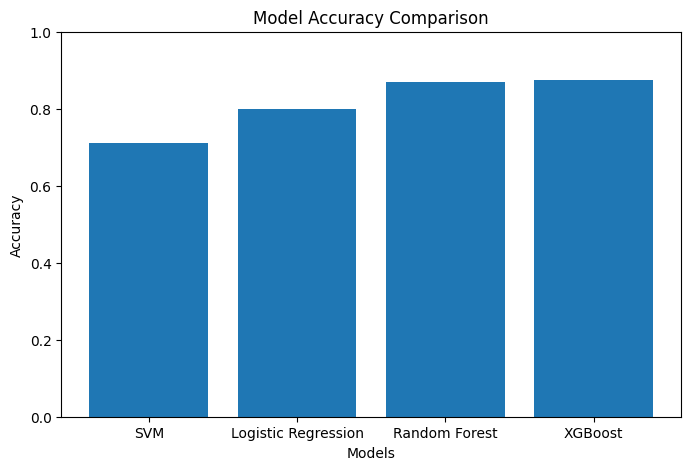

In [4]:
import matplotlib.pyplot as plt

# Accuracy dictionary
accuracies = {
    "SVM": 0.7120,
    "Logistic Regression": 0.7989,
    "Random Forest": 0.8696,
    "XGBoost": 0.8750
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values())
plt.title("Model Accuracy Comparison")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


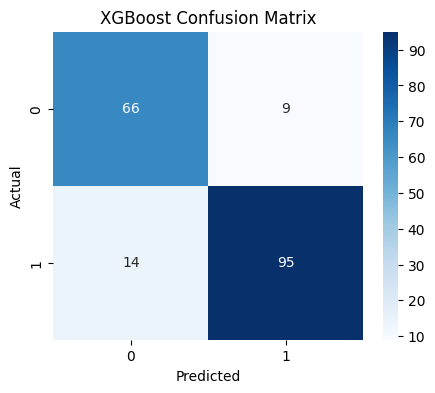

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        75
           1       0.91      0.87      0.89       109

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [5]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Use the best model (XGBoost)
best_model = models["XGBoost"]

# Predictions
y_pred = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


In [6]:
# Example: User input (replace values to test)
sample_data = {
    'age': 54,
    'trestbps': 130,
    'chol': 240,
    'thalch': 150,
    'oldpeak': 1.0,
    'sex_Male': 1,
    'cp_non-anginal': 0,
    'cp_asymptomatic': 1,
    'cp_atypical angina': 0,
    'fbs_True': 0,
    'restecg_lv hypertrophy': 1,
    'restecg_normal': 0,
    'exang_True': 0,
    'slope_flat': 1,
    'slope_upsloping': 0,
    'thal_fixed defect': 0,
    'thal_normal': 1,
    'thal_reversable defect': 0
}

import pandas as pd
# Convert to DataFrame
sample_df = pd.DataFrame([sample_data])

# Match feature columns
sample_df = sample_df.reindex(columns=X_train.columns, fill_value=0)

# Predict
prediction = best_model.predict(sample_df)[0]

# Output
if prediction == 1:
    print("🔴 The model predicts: Heart Disease Detected")
else:
    print("🟢 The model predicts: No Heart Disease Detected")


🔴 The model predicts: Heart Disease Detected


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [9]:
import os
import joblib

# Create the folder if it doesn’t exist
os.makedirs('/content/drive/MyDrive/ML_Models', exist_ok=True)

# Now save the model
joblib.dump(best_model, '/content/drive/MyDrive/ML_Models/heart_disease_model.pkl')

print("✅ Model saved to Google Drive successfully!")


✅ Model saved to Google Drive successfully!
